## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

## Importing data which have been extracted by using yfinance which is in API Apple Data

In [2]:
data=pd.read_excel('../DATA/AAPLStocks.xlsx')

In [3]:
data

,Unnamed: 0,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,month,day
0,0,0.147936,0.148888,0.143180,0.147936,146440000,0.0,0,1998,1,26
1,1,0.146034,0.149839,0.144607,0.145558,112235200,0.0,0,1998,1,27
2,2,0.146034,0.147461,0.141753,0.146034,151121600,0.0,0,1998,1,28
3,3,0.144131,0.145558,0.140802,0.140802,211881600,0.0,0,1998,1,29
4,4,0.139374,0.143655,0.138898,0.139374,162444800,0.0,0,1998,1,30
...,...,...,...,...,...,...,...,...,...,...,...
6287,6287,134.080002,136.250000,133.770004,135.270004,58280400,0.0,0,2023,1,19
6288,6288,135.279999,138.020004,134.220001,137.869995,79972200,0.0,0,2023,1,20
6289,6289,138.119995,143.320007,137.899994,141.110001,81760300,0.0,0,2023,1,23
6290,6290,140.309998,143.160004,140.300003,142.529999,66435100,0.0,0,2023,1,24


In [4]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [5]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,month,day
0,0.147936,0.148888,0.143180,0.147936,146440000,0.0,0,1998,1,26
1,0.146034,0.149839,0.144607,0.145558,112235200,0.0,0,1998,1,27
2,0.146034,0.147461,0.141753,0.146034,151121600,0.0,0,1998,1,28
3,0.144131,0.145558,0.140802,0.140802,211881600,0.0,0,1998,1,29
4,0.139374,0.143655,0.138898,0.139374,162444800,0.0,0,1998,1,30
...,...,...,...,...,...,...,...,...,...,...
6287,134.080002,136.250000,133.770004,135.270004,58280400,0.0,0,2023,1,19
6288,135.279999,138.020004,134.220001,137.869995,79972200,0.0,0,2023,1,20
6289,138.119995,143.320007,137.899994,141.110001,81760300,0.0,0,2023,1,23
6290,140.309998,143.160004,140.300003,142.529999,66435100,0.0,0,2023,1,24


In [6]:
data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
Year            0
month           0
day             0
dtype: int64

In [7]:
data.dtypes

Open            float64
High            float64
Low             float64
Close           float64
Volume            int64
Dividends       float64
Stock Splits      int64
Year              int64
month             int64
day               int64
dtype: object

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6292 entries, 0 to 6291
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          6292 non-null   float64
 1   High          6292 non-null   float64
 2   Low           6292 non-null   float64
 3   Close         6292 non-null   float64
 4   Volume        6292 non-null   int64  
 5   Dividends     6292 non-null   float64
 6   Stock Splits  6292 non-null   int64  
 7   Year          6292 non-null   int64  
 8   month         6292 non-null   int64  
 9   day           6292 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 491.7 KB


In [9]:
data['date']= pd.to_datetime(data[['Year', 'month','day']])

In [10]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,month,day,date
0,0.147936,0.148888,0.143180,0.147936,146440000,0.0,0,1998,1,26,1998-01-26
1,0.146034,0.149839,0.144607,0.145558,112235200,0.0,0,1998,1,27,1998-01-27
2,0.146034,0.147461,0.141753,0.146034,151121600,0.0,0,1998,1,28,1998-01-28
3,0.144131,0.145558,0.140802,0.140802,211881600,0.0,0,1998,1,29,1998-01-29
4,0.139374,0.143655,0.138898,0.139374,162444800,0.0,0,1998,1,30,1998-01-30
...,...,...,...,...,...,...,...,...,...,...,...
6287,134.080002,136.250000,133.770004,135.270004,58280400,0.0,0,2023,1,19,2023-01-19
6288,135.279999,138.020004,134.220001,137.869995,79972200,0.0,0,2023,1,20,2023-01-20
6289,138.119995,143.320007,137.899994,141.110001,81760300,0.0,0,2023,1,23,2023-01-23
6290,140.309998,143.160004,140.300003,142.529999,66435100,0.0,0,2023,1,24,2023-01-24


In [11]:
data.set_index('date', inplace=True)

In [12]:
data.drop(['Year', 'month','day'], axis=1,inplace=True)

In [13]:
data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [14]:
data.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,6292.000000,6292.000000,6292.000000,6292.000000,6.292000e+03,6292.000000,6292.000000
mean,26.814686,27.121171,26.512570,26.828094,4.198843e+08,0.001081,0.002384
std,42.284471,42.807039,41.777509,42.312058,3.853638e+08,0.013650,0.107695
min,0.134617,0.140802,0.132239,0.134617,3.519590e+07,0.000000,0.000000
25%,0.795188,0.822094,0.767509,0.789390,1.496880e+08,0.000000,0.000000
50%,7.932815,8.011357,7.828543,7.915763,3.073726e+08,0.000000,0.000000
75%,28.724533,28.940814,28.490394,28.689248,5.571797e+08,0.000000,0.000000
max,181.576172,181.884380,178.086416,180.959732,7.421641e+09,0.230000,7.000000


In [15]:
data.corr().T

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Open,1.000000,0.999930,0.999912,0.999813,-0.416959,0.082621,0.008730
High,0.999930,1.000000,0.999898,0.999912,-0.416183,0.082066,0.009002
Low,0.999912,0.999898,1.000000,0.999915,-0.418064,0.082378,0.008722
Close,0.999813,0.999912,0.999915,1.000000,-0.417129,0.082302,0.008979
Volume,-0.416959,-0.416183,-0.418064,-0.417129,1.000000,-0.054751,-0.003832
Dividends,0.082621,0.082066,0.082378,0.082302,-0.054751,1.000000,-0.001753
Stock Splits,0.008730,0.009002,0.008722,0.008979,-0.003832,-0.001753,1.000000


array([<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>,
       <AxesSubplot:xlabel='date'>], dtype=object)

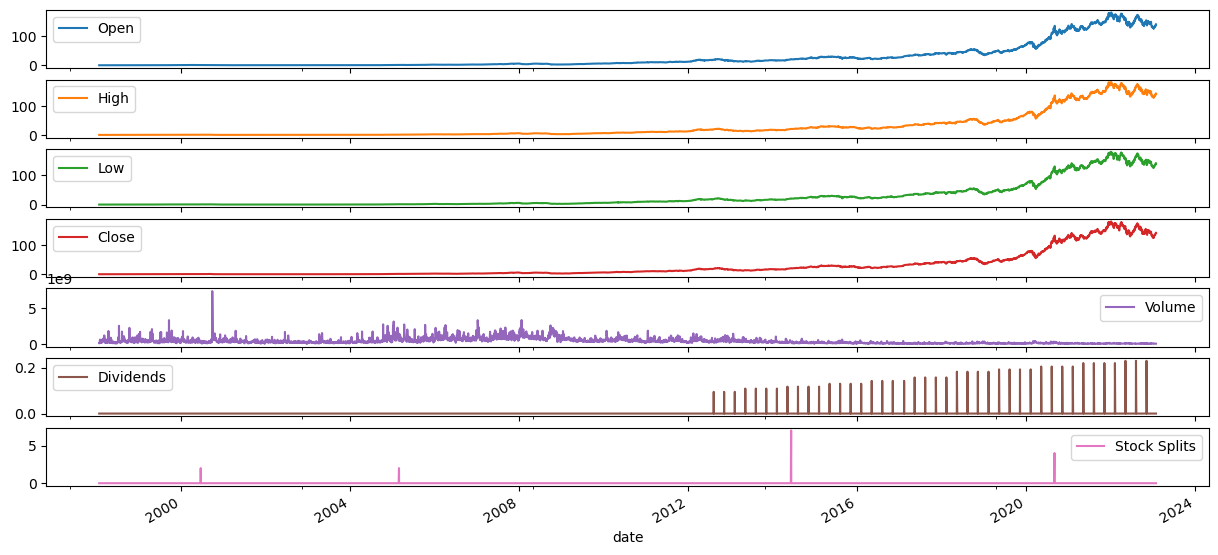

In [16]:
data.plot(subplots=True, figsize=(15,7))

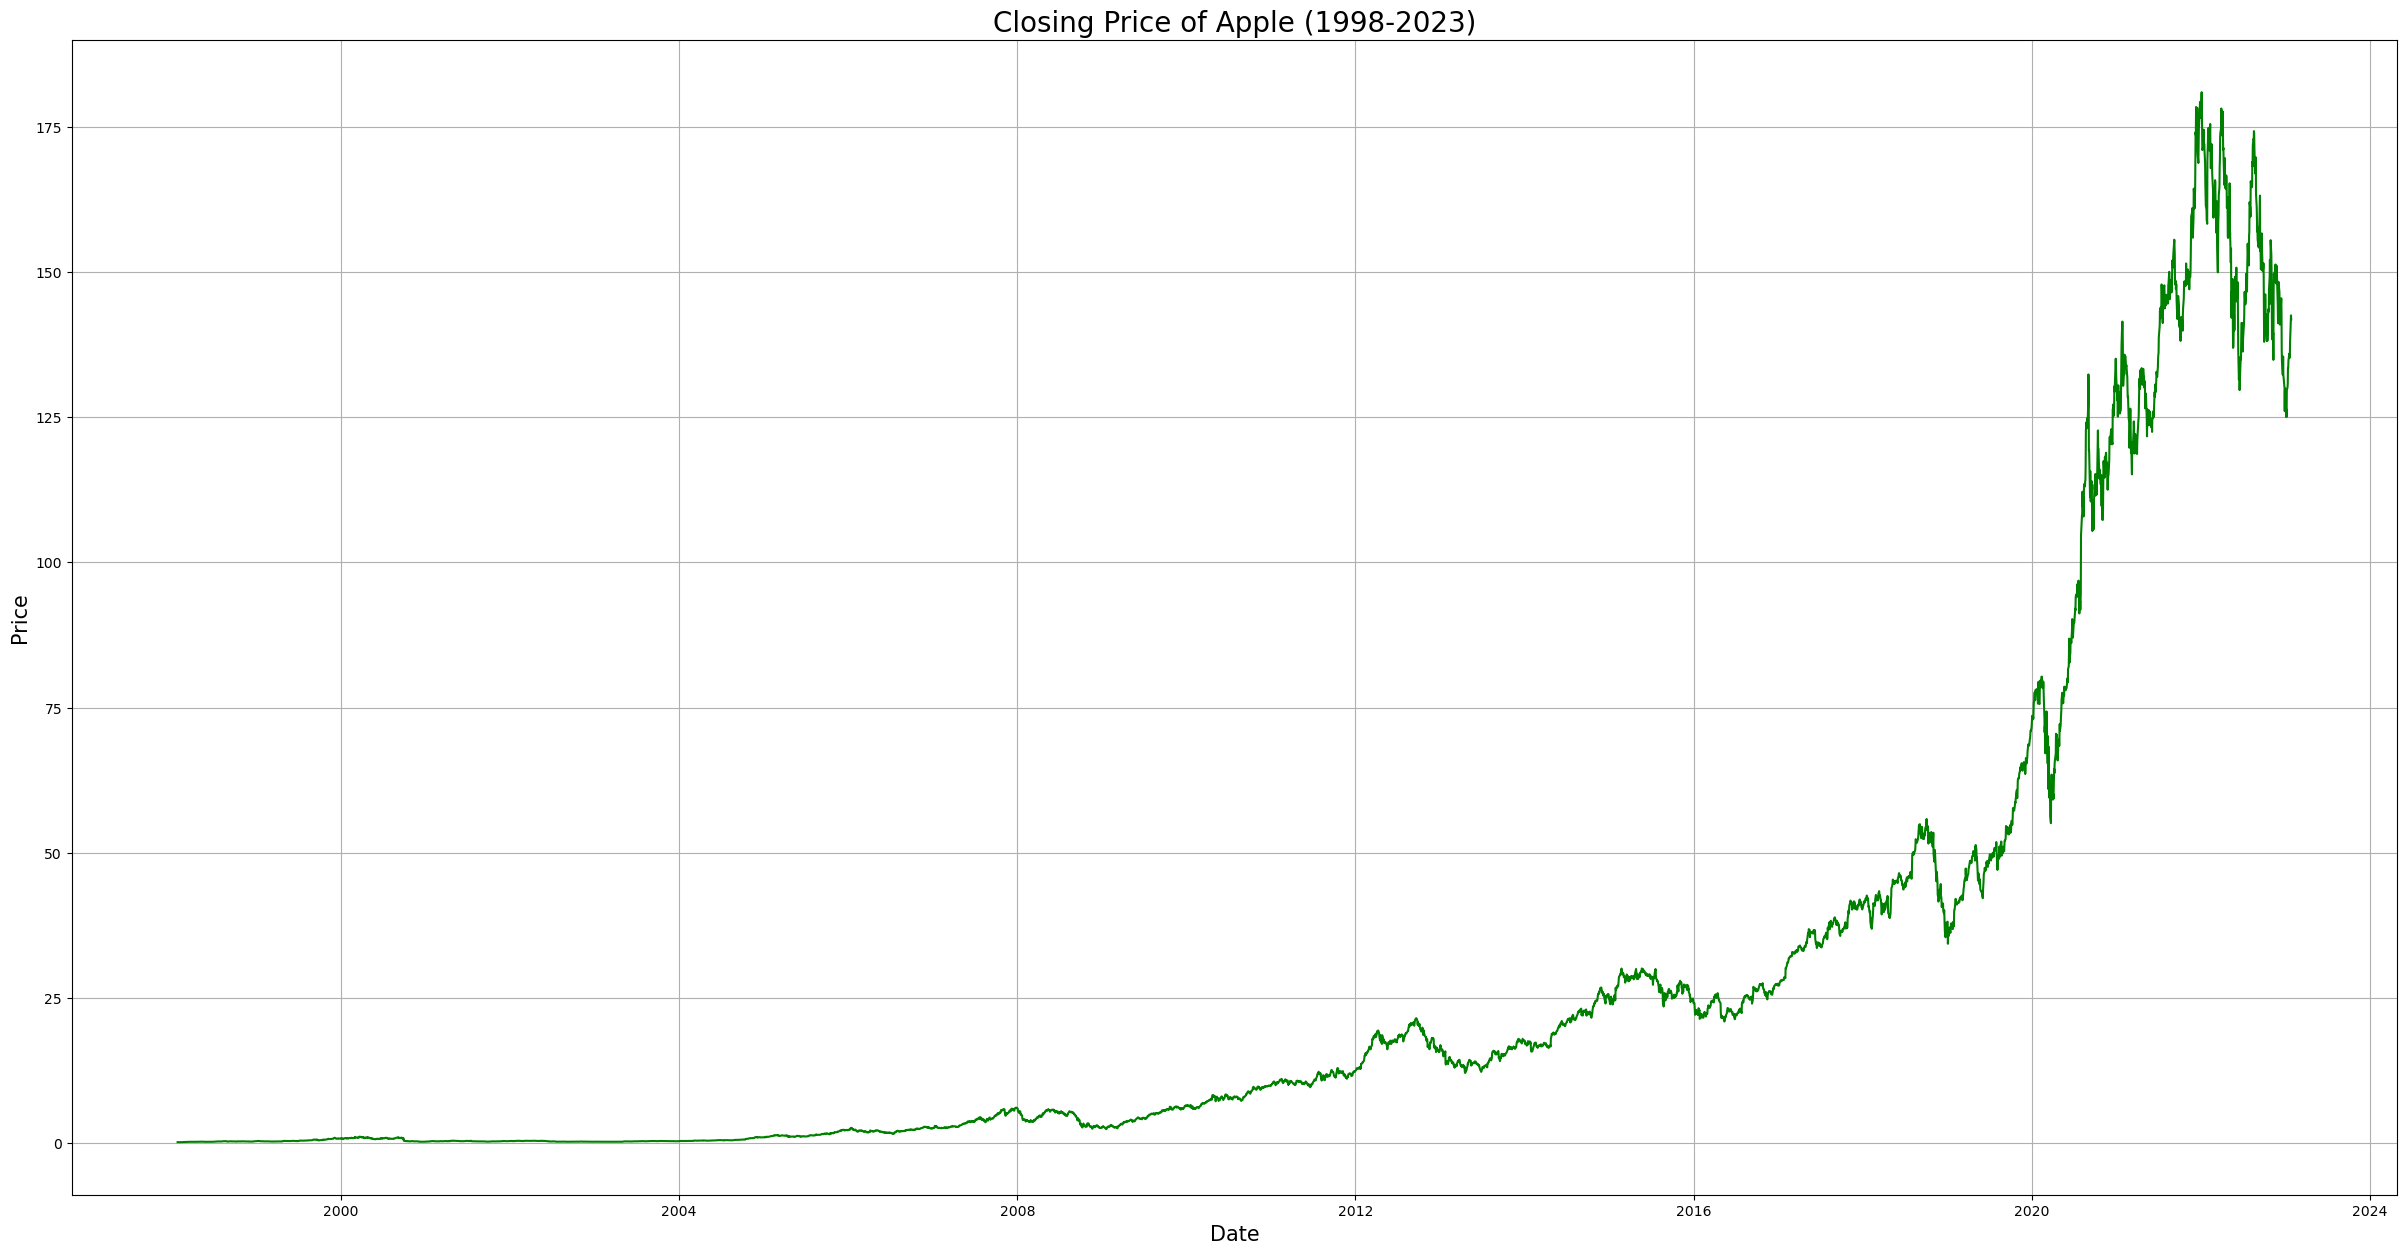

In [39]:
fig, ax = plt.subplots(figsize=(30,15))
ax.plot(data['Close'], color='g')
ax.set_xlabel("Date", fontsize=15)
ax.set_ylabel("Price", fontsize=15)
ax.set_title("Closing Price of Apple (1998-2023)", fontsize=20)
plt.grid()
plt.show()
fig.savefig('Closing_price.png')


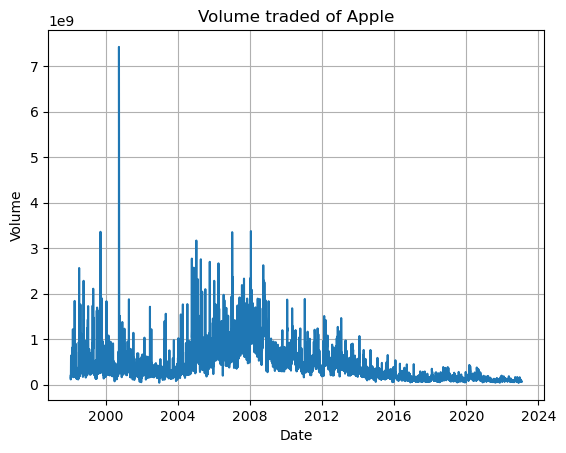

In [19]:

plt.plot(data.Volume)
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume traded of Apple')
plt.grid()
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x2005850cbe0>,
 'caps': [<matplotlib.lines.Line2D at 0x2005850ca30>,
 'boxes': [<matplotlib.lines.Line2D at 0x2005850cd90>],
 'medians': [<matplotlib.lines.Line2D at 0x2005604ed60>],
 'fliers': [<matplotlib.lines.Line2D at 0x20051e5cc10>],
 'means': []}

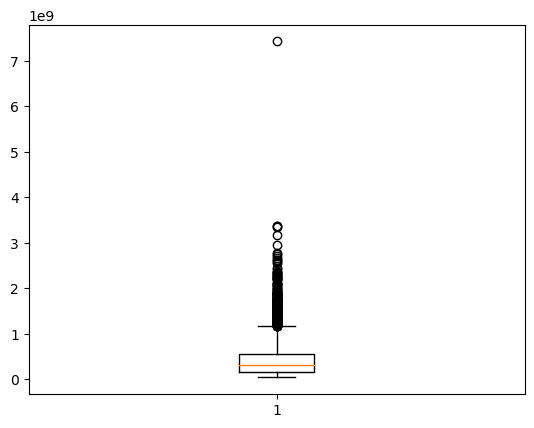

In [20]:
plt.boxplot(data.Volume)

In [21]:
sub_df=data[data['Open']>100]

In [22]:
sub_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
date,,,,,,,
2020-07-31,101.306835,104.782687,99.278429,104.630066,374336800,0.0,0
2020-08-03,106.540297,109.925068,106.237518,107.266487,308151200,0.0,0
2020-08-04,107.458493,109.090570,106.724918,107.982826,173071600,0.0,0
2020-08-05,107.699732,108.699162,107.227091,108.374222,121776800,0.0,0
2020-08-06,108.711478,112.657506,108.113298,112.155327,202428800,0.0,0
...,...,...,...,...,...,...,...
2023-01-19,134.080002,136.250000,133.770004,135.270004,58280400,0.0,0
2023-01-20,135.279999,138.020004,134.220001,137.869995,79972200,0.0,0
2023-01-23,138.119995,143.320007,137.899994,141.110001,81760300,0.0,0


EDA for open and close price of Apple Stock

<AxesSubplot:xlabel='count'>

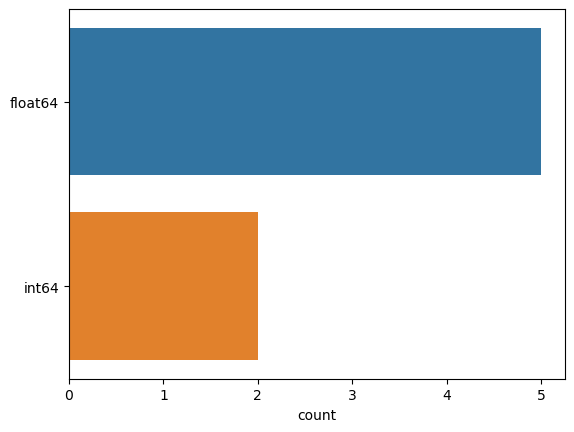

In [23]:
sns.countplot(y=data.dtypes ,data=data)

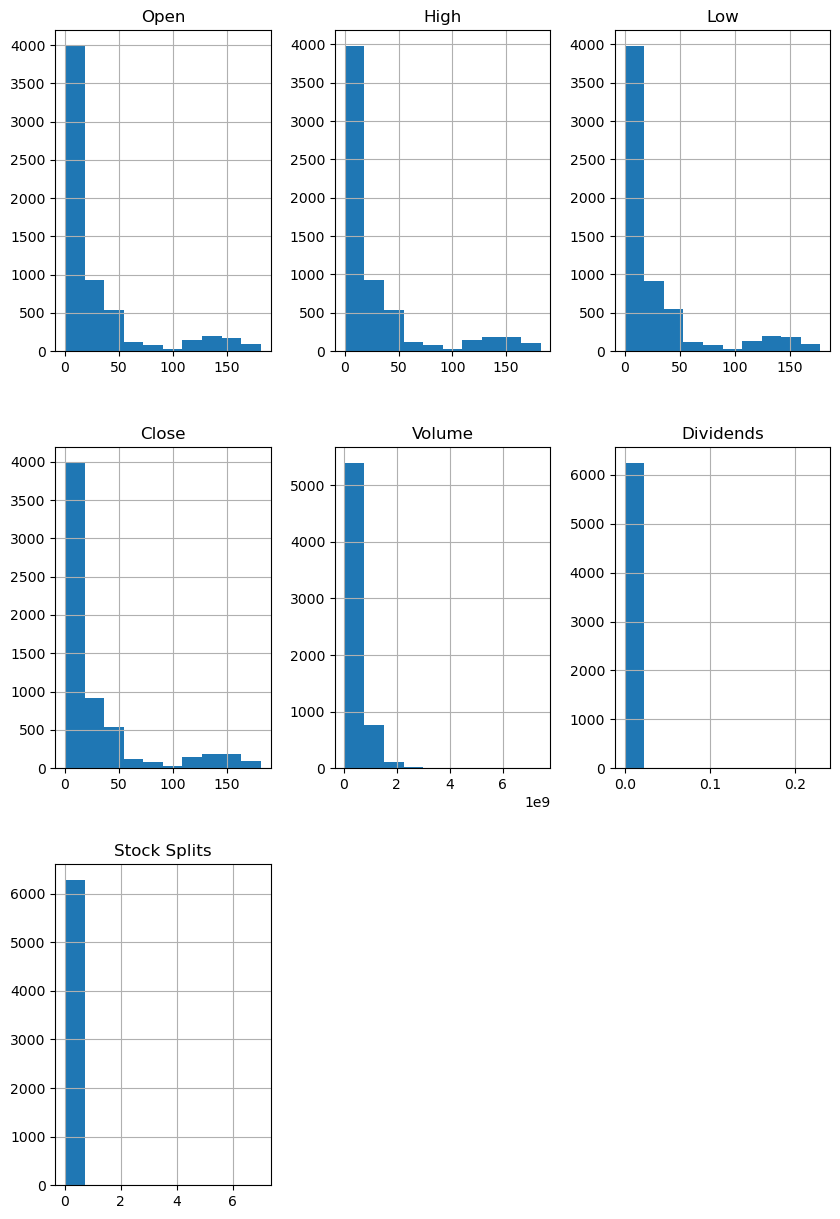

In [24]:
data.hist(figsize=(10,15))
plt.show()

In [25]:
import matplotlib.dates as mdates

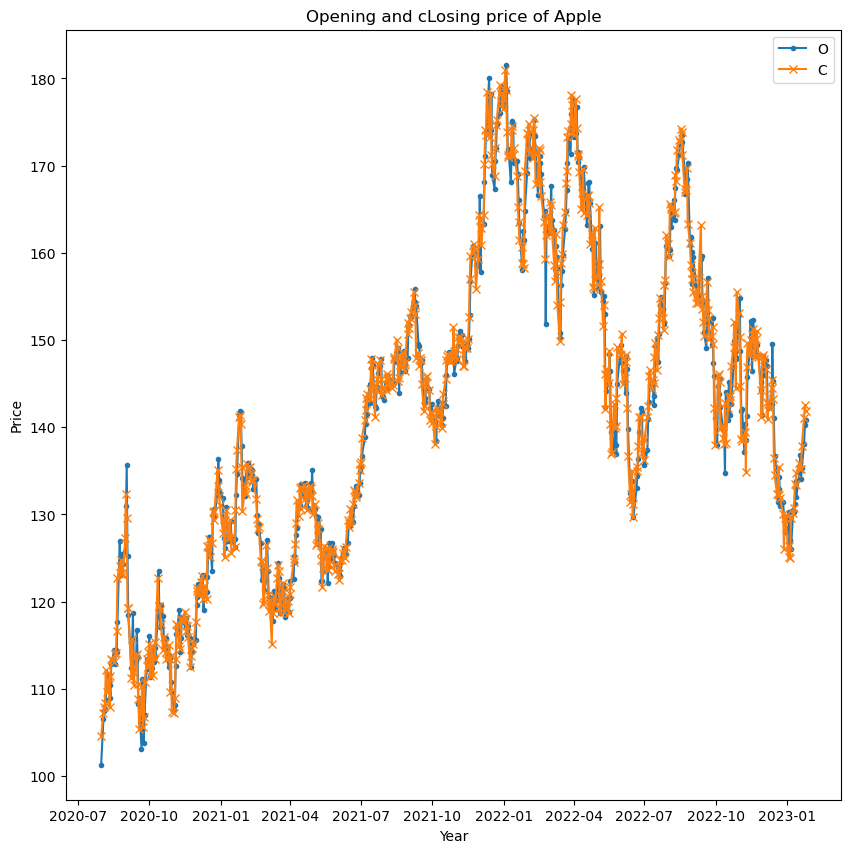

In [26]:
fig=plt.figure(figsize=(10,10))
plt.plot(sub_df.Open, marker='.')
plt.plot(sub_df.Close, marker='x')
plt.legend(['O','C'])
plt.title('Opening and cLosing price of Apple')
plt.xlabel('Year')
plt.ylabel('Price')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
xfmt = mdates.DateFormatter("%Y-%m")
plt.gca().xaxis.set_major_formatter(xfmt)
fig.savefig('Open-Close.png')

In [27]:
data.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

Pairplot of Target Variable with Independent Variable

In [28]:
target_col = 'Close'
feature_cols = [c for c in data.columns if c != target_col]

X =  data[feature_cols]
y = data[target_col]

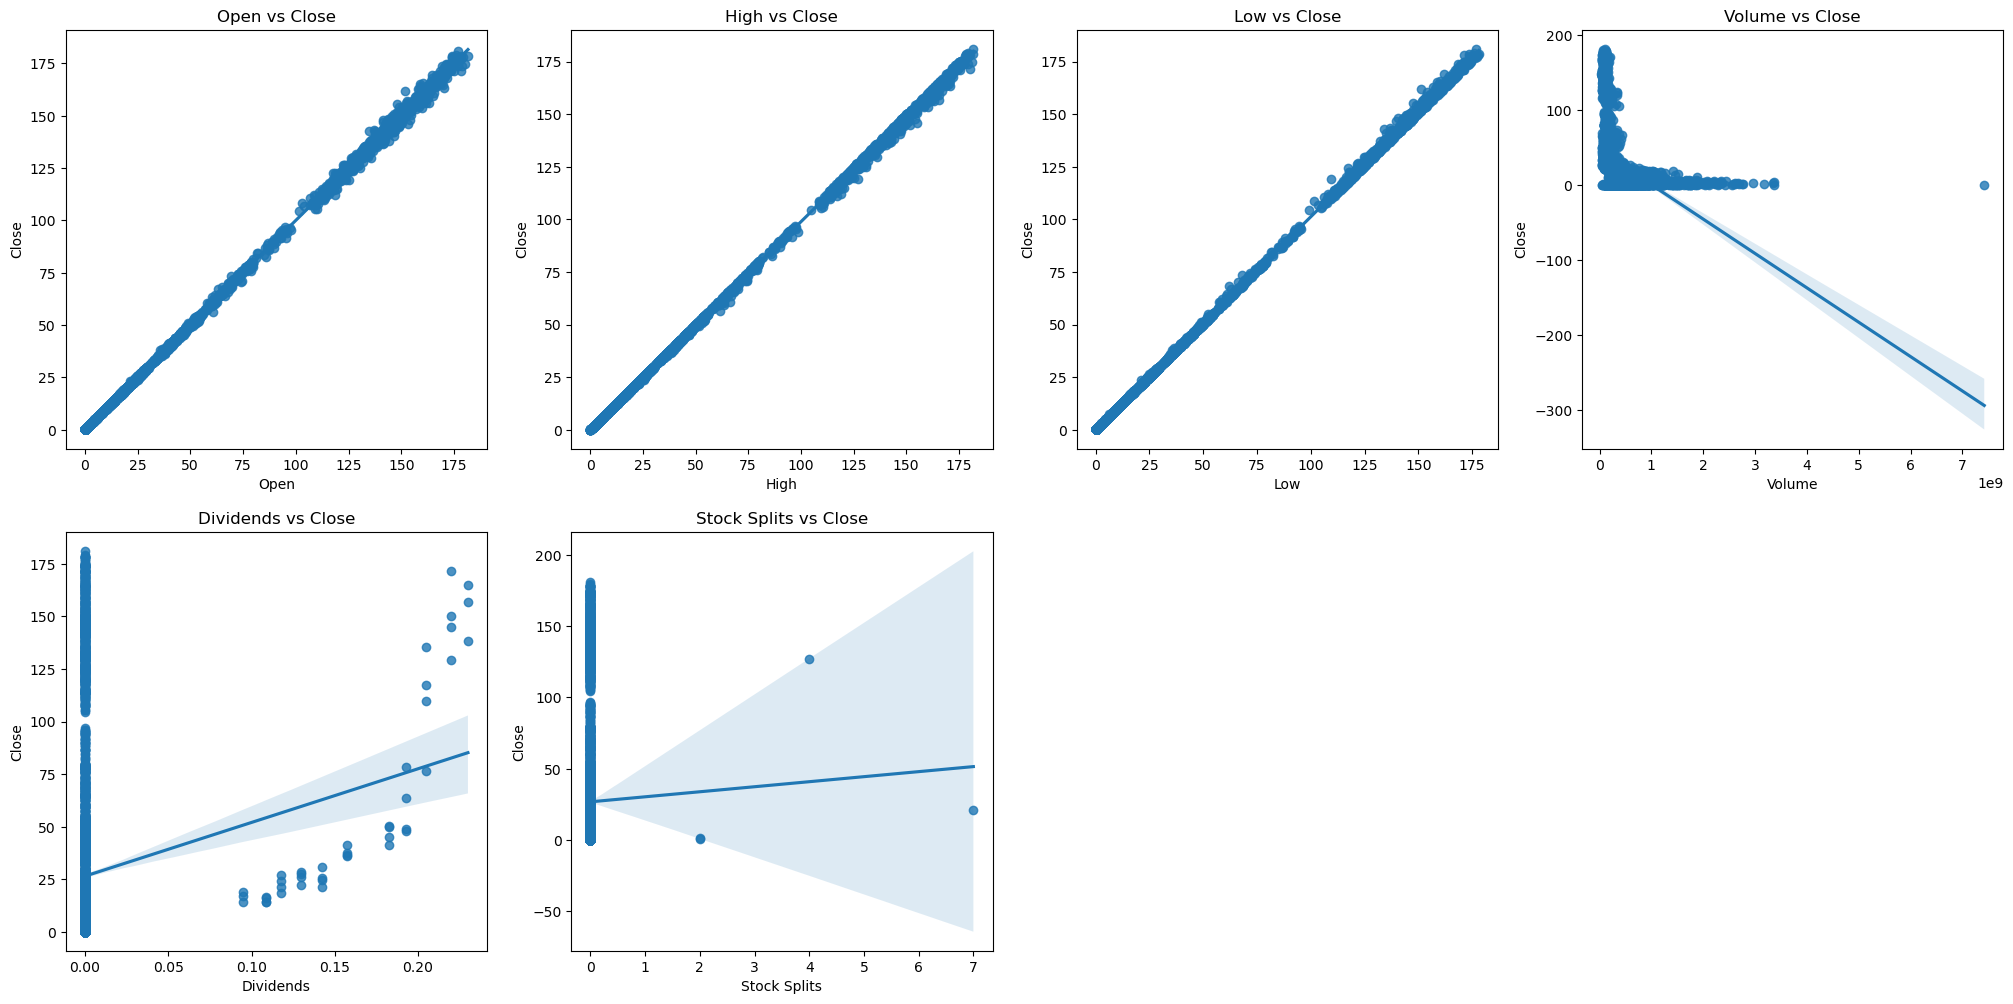

In [29]:
plt.figure(figsize=(25, 25))
for i, col in enumerate(X):
    plt.subplot(4, 4 , i+1)
    sns.regplot(x=col, y=y, data=data)
    plt.title("%s vs Close" %(col))

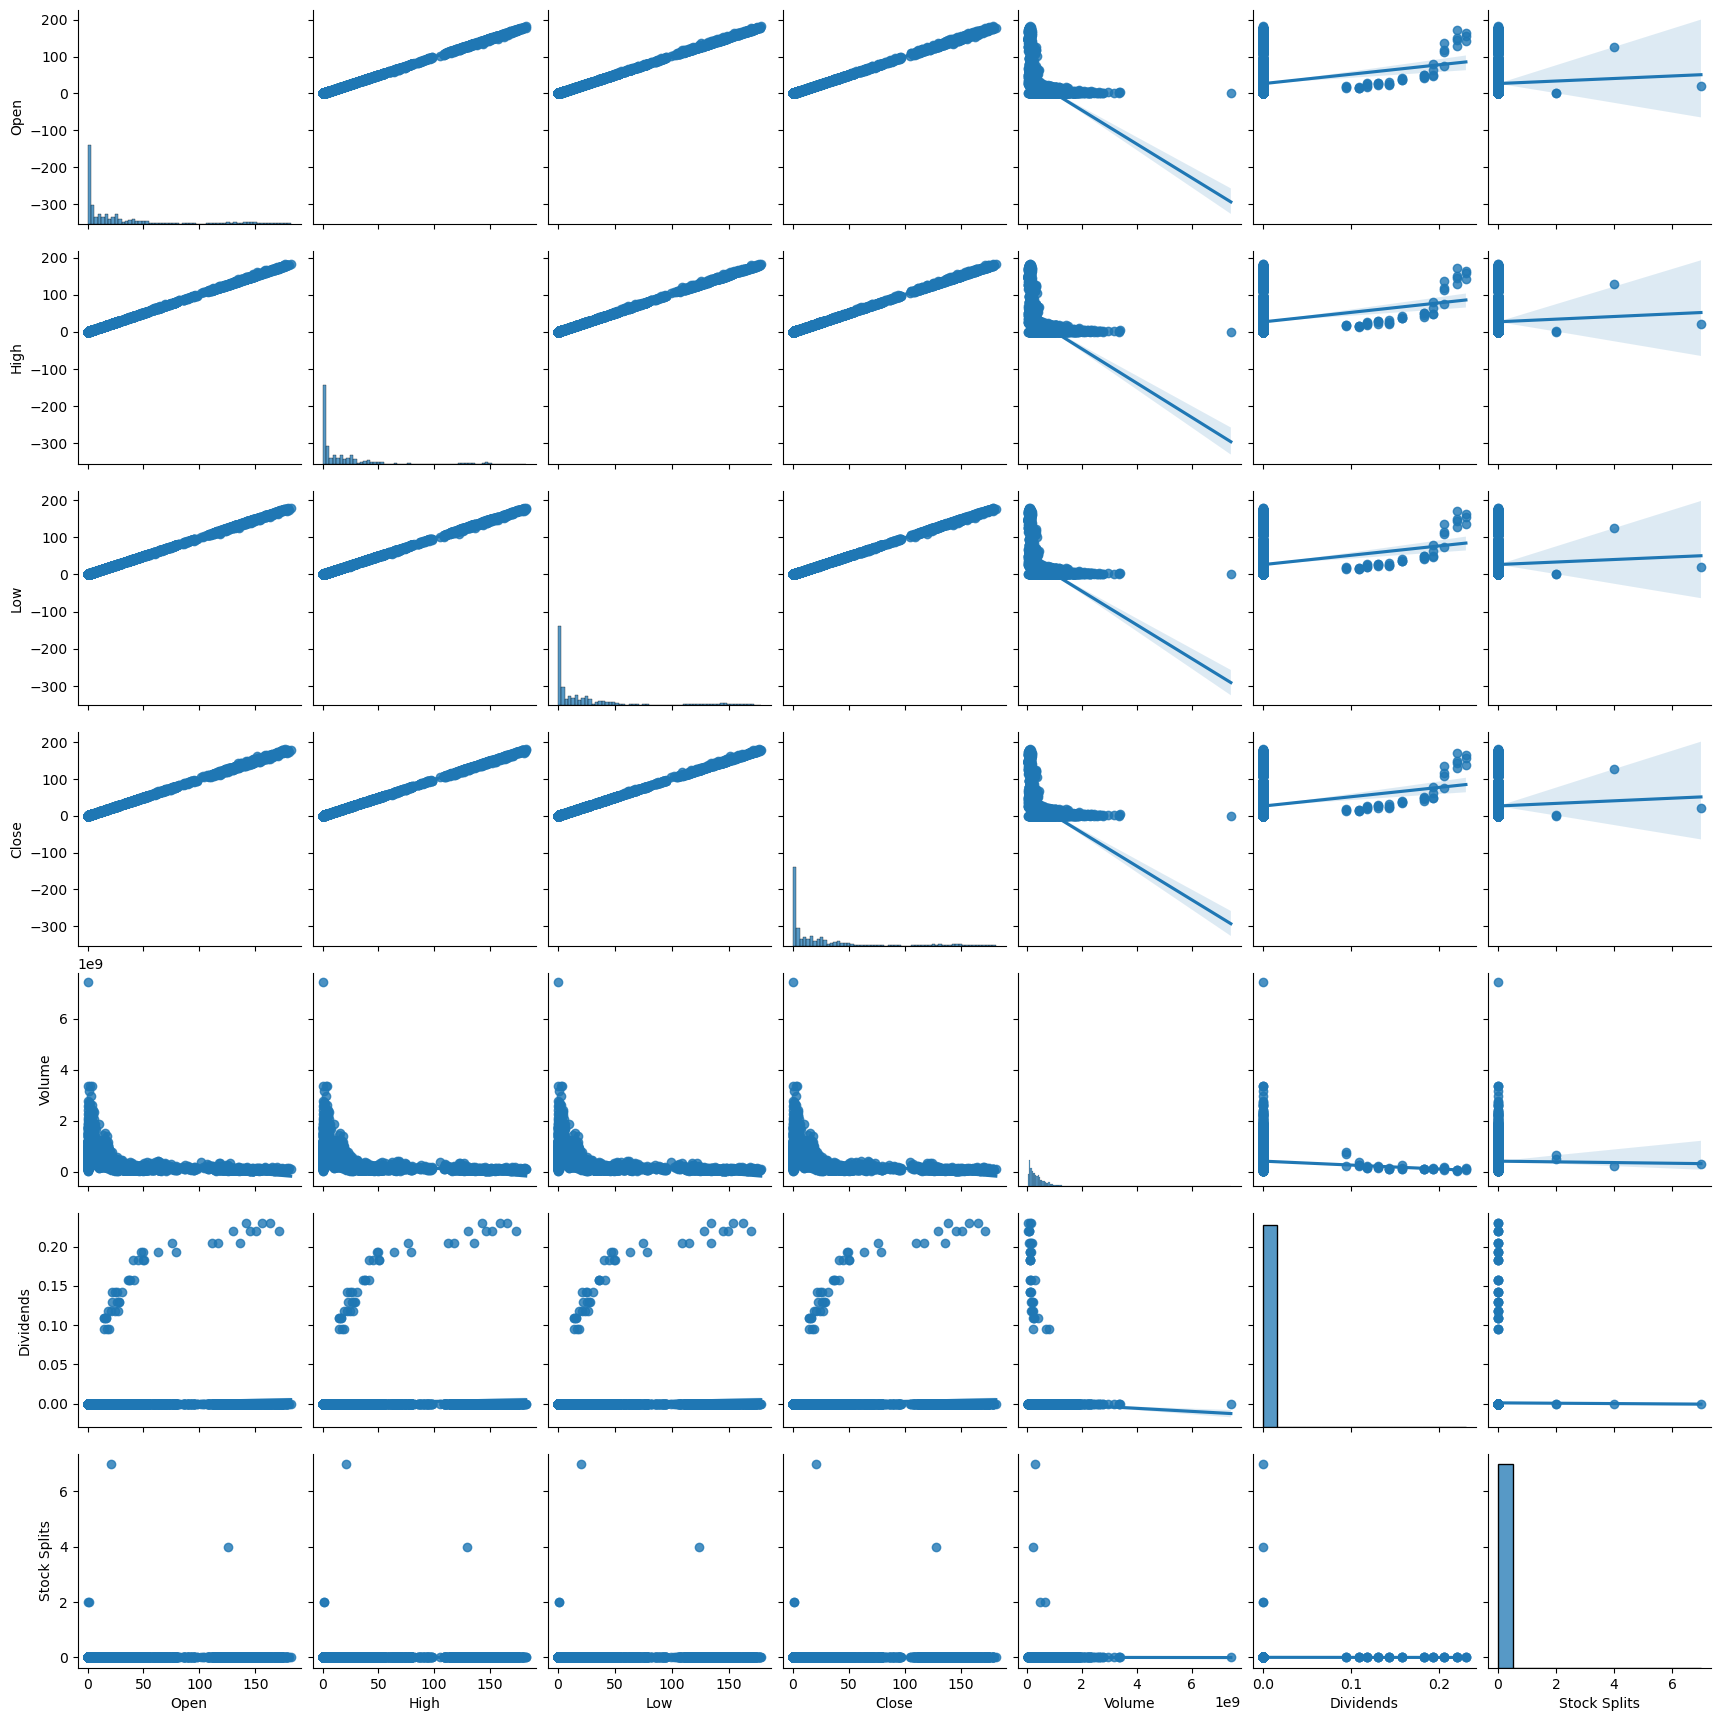

In [30]:
sns.pairplot(data=data, kind='reg')

## Looking for investment over time

In [31]:
df= data.copy()

In [32]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
date,,,,,,,
1998-01-26,0.147936,0.148888,0.143180,0.147936,146440000,0.0,0
1998-01-27,0.146034,0.149839,0.144607,0.145558,112235200,0.0,0
1998-01-28,0.146034,0.147461,0.141753,0.146034,151121600,0.0,0
1998-01-29,0.144131,0.145558,0.140802,0.140802,211881600,0.0,0
1998-01-30,0.139374,0.143655,0.138898,0.139374,162444800,0.0,0
...,...,...,...,...,...,...,...
2023-01-19,134.080002,136.250000,133.770004,135.270004,58280400,0.0,0
2023-01-20,135.279999,138.020004,134.220001,137.869995,79972200,0.0,0
2023-01-23,138.119995,143.320007,137.899994,141.110001,81760300,0.0,0


In [33]:
df.reset_index(inplace=True)

In [34]:
datetime = df[df['Close'] == df['Close'].max()]['date'].values
high = round(df['Close'].max())

In [35]:
datetime

array(['2022-01-03T00:00:00.000000000'], dtype='datetime64[ns]')

In [36]:
high

181

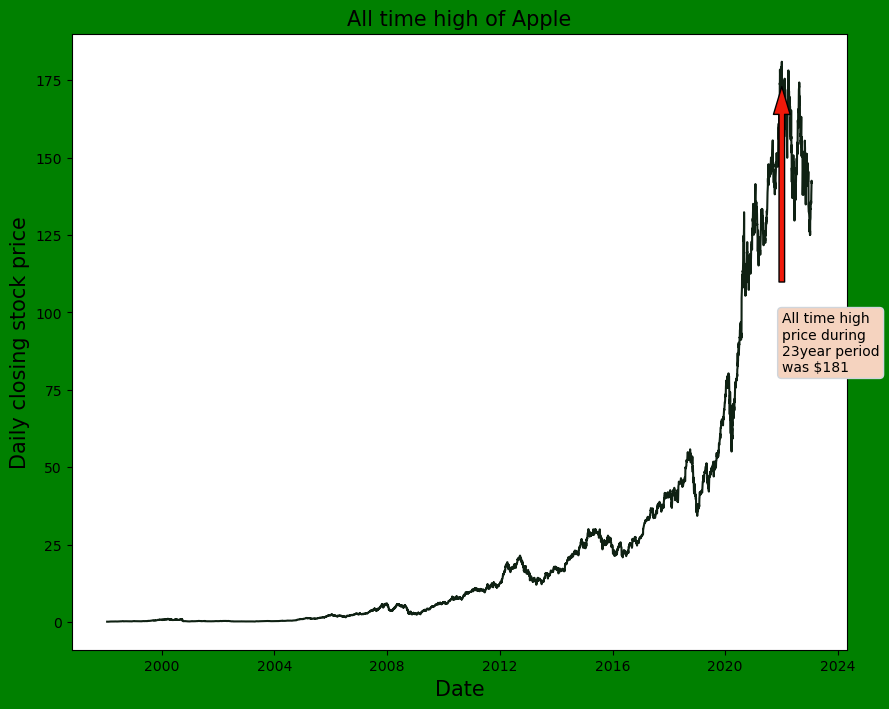

In [38]:
fig, ax = plt.subplots(figsize=(10,8), facecolor='green')
ax.plot(df['date'], df['Close'], color='#0f2113')
ax.set_xlabel("Date", fontsize=15)
ax.set_ylabel("Daily closing stock price", fontsize=15)
ax.set_title('All time high of Apple', fontsize=15)
ax.annotate(f"All time high\nprice during\n23year period\nwas ${high}", xy=(datetime, high),xytext=(datetime,high-100),bbox=dict(boxstyle="round",facecolor='#f5d3bf', edgecolor='#d0d5db'),arrowprops=dict(facecolor='#f0190a',headlength=20, shrink=0.1))
plt.show()
fig.savefig('Highest_price.png')

In [ ]:
data.Dividends.value_counts()

In [ ]:
data['Stock Splits'].value_counts()

## Checking today's worth when you invested 100 dollars at 1998

In [40]:
df['returns'] = df['Close'].pct_change()

# calculate cumulative returns
df['cumulative_returns'] = (1+ df['returns']).cumprod()


In [41]:
df

,date,Open,High,Low,Close,Volume,Dividends,Stock Splits,returns,cumulative_returns
0,1998-01-26,0.147936,0.148888,0.143180,0.147936,146440000,0.0,0,NaN,NaN
1,1998-01-27,0.146034,0.149839,0.144607,0.145558,112235200,0.0,0,-0.016076,0.983924
2,1998-01-28,0.146034,0.147461,0.141753,0.146034,151121600,0.0,0,0.003268,0.987139
3,1998-01-29,0.144131,0.145558,0.140802,0.140802,211881600,0.0,0,-0.035828,0.951771
4,1998-01-30,0.139374,0.143655,0.138898,0.139374,162444800,0.0,0,-0.010140,0.942120
...,...,...,...,...,...,...,...,...,...,...
6287,2023-01-19,134.080002,136.250000,133.770004,135.270004,58280400,0.0,0,0.000444,914.380073
6288,2023-01-20,135.279999,138.020004,134.220001,137.869995,79972200,0.0,0,0.019221,931.955143
6289,2023-01-23,138.119995,143.320007,137.899994,141.110001,81760300,0.0,0,0.023500,953.856499
6290,2023-01-24,140.309998,143.160004,140.300003,142.529999,66435100,0.0,0,0.010063,963.455212


In [42]:
df['investment'] = 100 * (1 + df['cumulative_returns'])

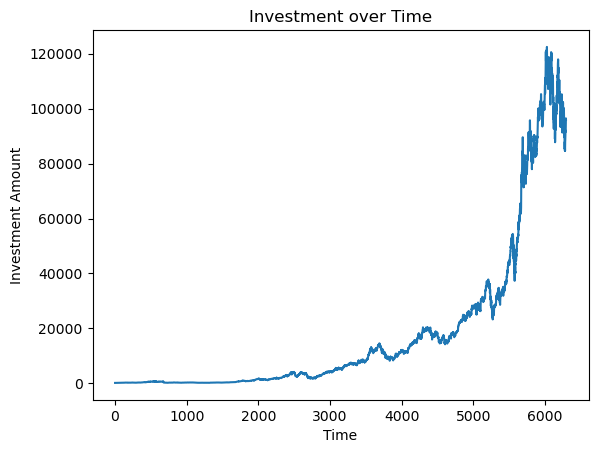

In [43]:
plt.plot(df['investment'])
plt.xlabel('Time')
plt.ylabel('Investment Amount')
plt.title('Investment over Time')
plt.show()

In [44]:
datetime = df[df['investment'] == df['investment'].max()]['date'].values
high = round(df['investment'].max())

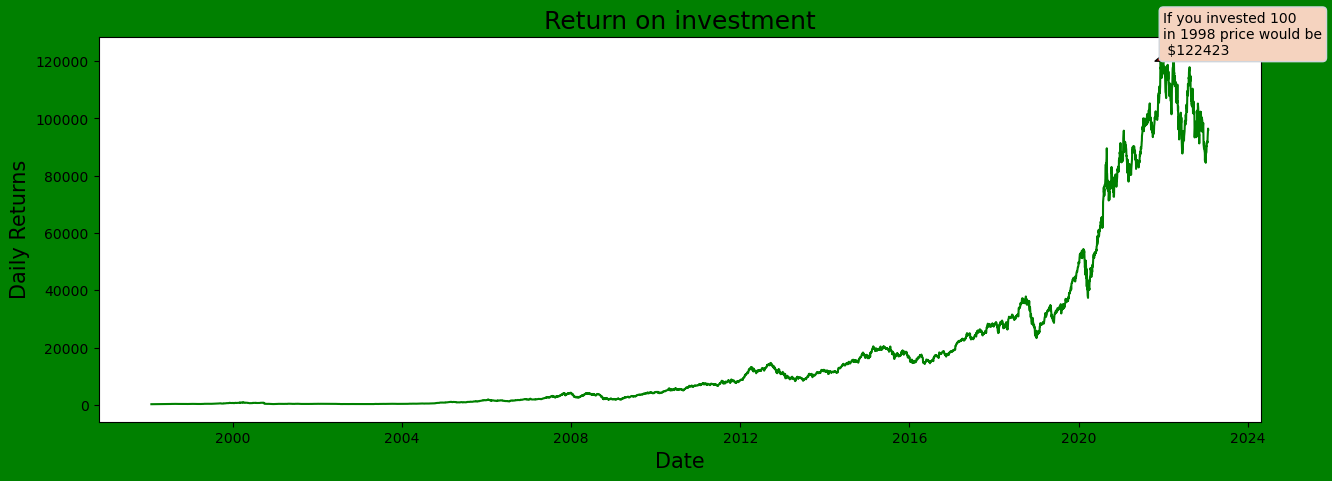

In [45]:
fig, ax = plt.subplots(figsize=(15,5), facecolor='green')
ax.plot(df['date'], df['investment'], color='green')
ax.set_xlabel("Date", fontsize=15)
ax.set_ylabel("Daily Returns", fontsize=15)
ax.set_title('Return on investment', fontsize=18)
ax.annotate(f"If you invested 100\nin 1998 price would be\n ${high}", xy=(datetime, high),xytext=(datetime,high-100),bbox=dict(boxstyle="round",facecolor='#f5d3bf', edgecolor='#d0d5db'),arrowprops=dict(facecolor='#f0190a',headlength=5, shrink=10))
plt.show()
fig.savefig('Return_all_time.png')

If you invested 100$ it would be worth 122,423 in 2023.

### All-time high

In [46]:
high= data.copy()
high.reset_index(inplace=True)
high=high.loc[(high['date']>='2022-01-03')].copy()
high


,date,Open,High,Low,Close,Volume,Dividends,Stock Splits
6025,2022-01-03,176.803859,181.824722,176.684557,180.959732,104487900,0.0,0
6026,2022-01-04,181.576172,181.884380,178.086416,178.663071,99310400,0.0,0
6027,2022-01-05,178.573600,179.130366,173.632277,173.910660,94537600,0.0,0
6028,2022-01-06,171.703465,174.288468,170.649584,171.007507,96904000,0.0,0
6029,2022-01-07,171.892360,173.135147,170.043092,171.176514,86709100,0.0,0
...,...,...,...,...,...,...,...,...
6287,2023-01-19,134.080002,136.250000,133.770004,135.270004,58280400,0.0,0
6288,2023-01-20,135.279999,138.020004,134.220001,137.869995,79972200,0.0,0
6289,2023-01-23,138.119995,143.320007,137.899994,141.110001,81760300,0.0,0
6290,2023-01-24,140.309998,143.160004,140.300003,142.529999,66435100,0.0,0


In [47]:
all_time_high = high["Close"].max()

In [48]:
all_time_high_row = high[high["Close"] == all_time_high]

In [49]:
all_time_high_date = high["date"].values[0]

In [50]:
last_row = high.iloc[-1]

In [51]:
investment_return = (last_row["Close"] / all_time_high) * 100 - 100

In [52]:
high['ROI'] = (high['Close'] - all_time_high) / all_time_high * 100

In [53]:
high

,date,Open,High,Low,Close,Volume,Dividends,Stock Splits,ROI
6025,2022-01-03,176.803859,181.824722,176.684557,180.959732,104487900,0.0,0,0.000000
6026,2022-01-04,181.576172,181.884380,178.086416,178.663071,99310400,0.0,0,-1.269156
6027,2022-01-05,178.573600,179.130366,173.632277,173.910660,94537600,0.0,0,-3.895382
6028,2022-01-06,171.703465,174.288468,170.649584,171.007507,96904000,0.0,0,-5.499690
6029,2022-01-07,171.892360,173.135147,170.043092,171.176514,86709100,0.0,0,-5.406296
...,...,...,...,...,...,...,...,...,...
6287,2023-01-19,134.080002,136.250000,133.770004,135.270004,58280400,0.0,0,-25.248561
6288,2023-01-20,135.279999,138.020004,134.220001,137.869995,79972200,0.0,0,-23.811782
6289,2023-01-23,138.119995,143.320007,137.899994,141.110001,81760300,0.0,0,-22.021325
6290,2023-01-24,140.309998,143.160004,140.300003,142.529999,66435100,0.0,0,-21.236621


In [54]:
datetime = high[high['ROI'] == high['ROI'].min()]['date'].values
higher = round(high['ROI'].min())

In [55]:
datetime,higher

(array(['2023-01-05T00:00:00.000000000'], dtype='datetime64[ns]'), -31)

(array([18993.]), array([19358.]))

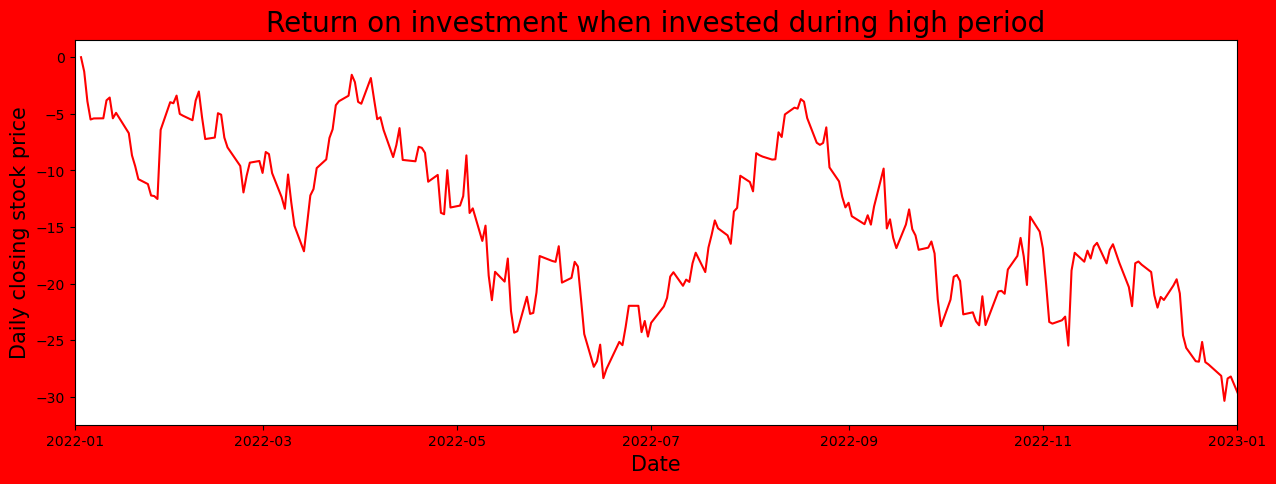

In [70]:
fig, ax = plt.subplots(figsize=(15,5), facecolor='red')
ax.plot(high['date'], high['ROI'], color='red')
ax.set_xlabel("Date", fontsize=15)
ax.set_ylabel("Daily closing stock price", fontsize=15)
ax.set_title('Return on investment when invested during high period', fontsize=20)
ax.annotate(f"If you invested $100\n during higher period\n you would lose\n ${higher}", xy=(datetime, higher),xytext=(datetime,higher+10),bbox=dict(boxstyle="round",facecolor='#f5d3bf', edgecolor='#d0d5db'),arrowprops=dict(facecolor='#f0190a',headlength=5, shrink=100))

fig.savefig('Loss.png')


In [ ]:
print(f"If you invested $100 in Apple stock on {all_time_high_date} when the stock was at its all-time high of ${all_time_high}, your investment would be worth ${(100 + investment_return):.2f} as of {last_row['date']}")

## If you invested 100 in 1998 what would be the money in 2023?

In [ ]:
d=data.copy()
d.reset_index(inplace=True)
d


In [ ]:
start_index = d[d['date'] == '1998-01-26'].index[0]
start_index

In [ ]:
end_index= d.loc[d['date'] == '2023-01-25','Close'].index[0]
end_index

In [ ]:
start_price = d.loc[start_index, 'Close']
end_price = d.loc[end_index, 'Close']
start_price,end_price

In [ ]:
return_on_investment = (end_price * 100 / start_price) - 100


In [ ]:
print("If you invested $100 in Apple stock in 1998, your return on investment would be {:.2f}",(return_on_investment))

## Checking the worth of investment when  the price of Apple was all-time high

In [ ]:
d[d['Close']>180 ]

In [ ]:
new_high= d.loc[d['date'] == '2022-01-03'].index[0]
new_high = d.loc[new_high, 'Close']
start_price, new_high

In [ ]:
return_on_investment_high = (new_high* 100 / start_price) - 100

In [ ]:
print("If you invested $100 in Apple stock in 1998, your return during higher period would be  {:.2f}".format(return_on_investment_high))

## What if you invested during all-time high?

In [ ]:
high_invest=d.loc[d['date'] == '2022-01-03'].index[0]

In [ ]:
high_invest = d.loc[high_invest, 'Close']

In [ ]:
end_return= d.loc[d['date'] == '2023-01-25','Close'].index[0]
end_return=d.loc[end_return, 'Close']
end_return

In [ ]:
return_on_investment_high = (end_return* 100 / high_invest) - 100

In [ ]:
print("If you invested $100 in Apple stock when stock was high, your return during higher period would be  {:.2f}".format(return_on_investment_high))

### If you invested during the all time high you would loose the money now.

## Old

In [87]:
low=data[(data['Close']>60) & (data['Close']<120)]


In [88]:
low.reset_index(inplace=True)

In [89]:
low['returns'] = low['Close'].pct_change()

C:\Users\User\AppData\Local\Temp\ipykernel_11904\1885527132.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low['returns'] = low['Close'].pct_change()


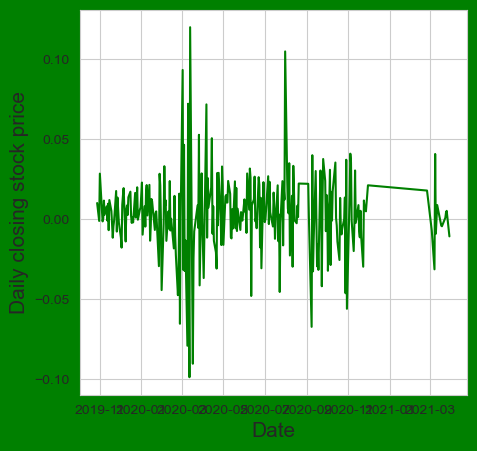

In [90]:
fig, ax = plt.subplots(figsize=(5,5), facecolor='green')
ax.plot(low['date'], low['returns'], color='green')
ax.set_xlabel("Date", fontsize=15)
ax.set_ylabel("Daily closing stock price", fontsize=15)
#ax.annotate(f"If you invested 100\nin during high price would be\n ${high}", xy=(datetime, high),xytext=(datetime,high-35),bbox=dict(boxstyle="round",facecolor='#f5d3bf', edgecolor='#d0d5db'),arrowprops=dict(facecolor='#f0190a',headlength=5, shrink=10))
plt.show()

## Daily Returns

In [71]:
daily_returns=data.copy()

In [72]:
daily_returns['daily_returns'] = daily_returns['Close'].pct_change()

In [73]:
daily_returns[daily_returns['daily_returns']==daily_returns['daily_returns'].max()]['daily_returns']

date
1999-10-14    0.142996
Name: daily_returns, dtype: float64

In [74]:
daily_returns[daily_returns['daily_returns']==daily_returns['daily_returns'].min()]['daily_returns']

date
2000-09-29   -0.518692
Name: daily_returns, dtype: float64

Text(0.5, 1.0, 'Apple Stock Daily Returns')

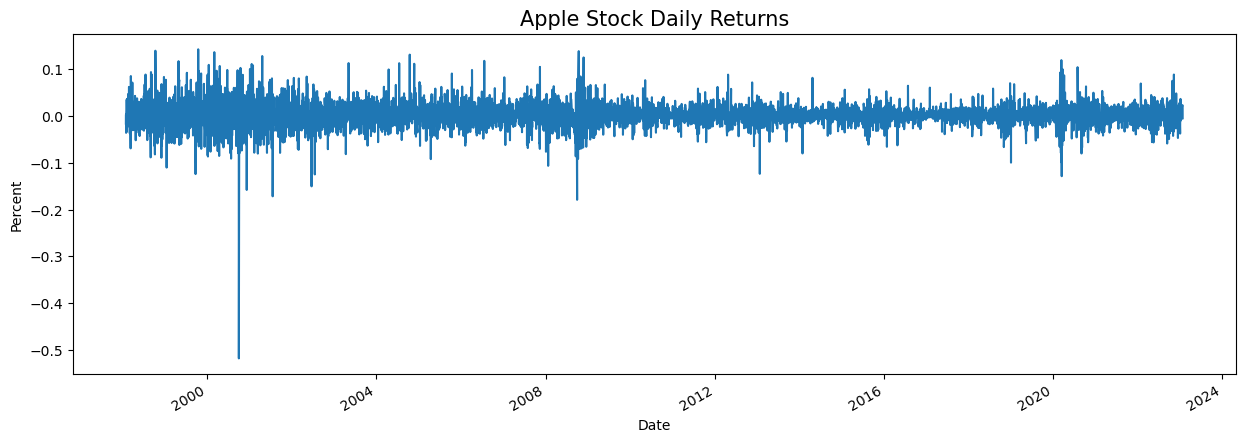

In [75]:
plt.figure(figsize=(15,5))
daily_returns['daily_returns'].plot()
plt.xlabel("Date")
plt.ylabel("Percent")
plt.title("Apple Stock Daily Returns",fontsize= 15 )


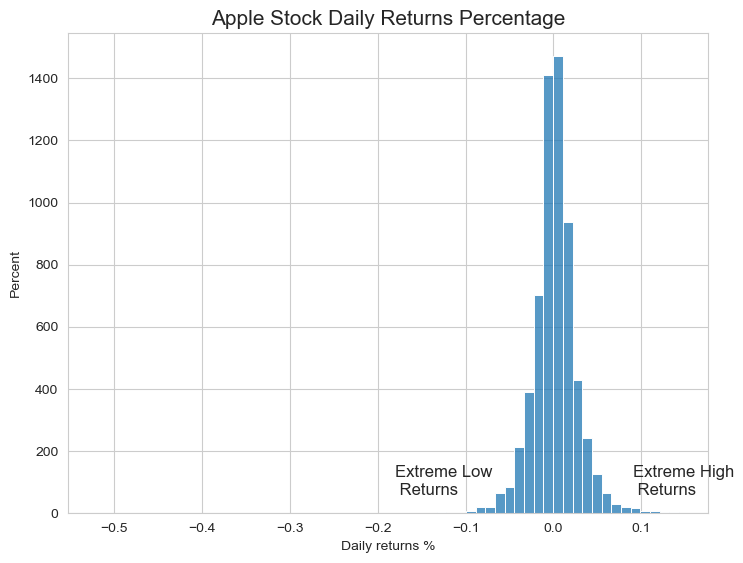

In [76]:
sns.set_style('whitegrid')
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
sns.histplot(data= daily_returns['daily_returns'], bins=60)
ax1.set_xlabel("Daily returns %")
ax1.set_ylabel("Percent")
ax1.set_title("Apple Stock Daily Returns Percentage",fontsize= 15 )
ax1.text(-0.18,60,"Extreme Low\n Returns",fontsize= 12)
ax1.text(0.09,60,"Extreme High\n Returns", fontsize= 12)
plt.show()

In [77]:
volume= data.copy()
volume.reset_index(inplace=True)
volume

,date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,1998-01-26,0.147936,0.148888,0.143180,0.147936,146440000,0.0,0
1,1998-01-27,0.146034,0.149839,0.144607,0.145558,112235200,0.0,0
2,1998-01-28,0.146034,0.147461,0.141753,0.146034,151121600,0.0,0
3,1998-01-29,0.144131,0.145558,0.140802,0.140802,211881600,0.0,0
4,1998-01-30,0.139374,0.143655,0.138898,0.139374,162444800,0.0,0
...,...,...,...,...,...,...,...,...
6287,2023-01-19,134.080002,136.250000,133.770004,135.270004,58280400,0.0,0
6288,2023-01-20,135.279999,138.020004,134.220001,137.869995,79972200,0.0,0
6289,2023-01-23,138.119995,143.320007,137.899994,141.110001,81760300,0.0,0
6290,2023-01-24,140.309998,143.160004,140.300003,142.529999,66435100,0.0,0


In [84]:
max_x= volume['date'].max()
max_y= volume['Volume'].max()

min_x= volume['date'].min()
min_y= volume['Volume'].min()

mean_x= volume['date'].mean()
mean_y= volume['Volume'].mean()

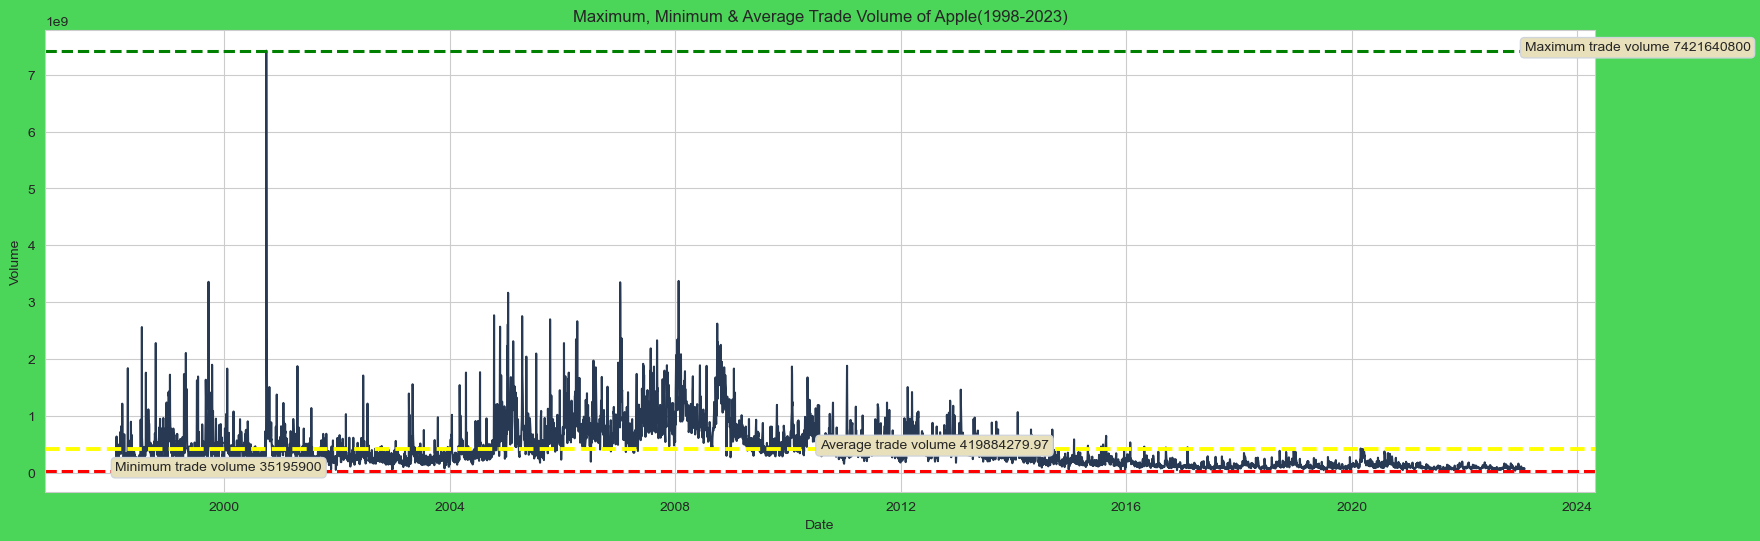

In [86]:
fig, ax = plt.subplots(figsize=(20,6), facecolor='#4bd659')
ax.plot(volume['date'], volume['Volume'], color='#283954')
ax.axhline(y=volume['Volume'].max(), linestyle='--', lw=2.2, color='green')
ax.axhline(y=volume['Volume'].min(), linestyle='--',lw=2.2, color='red')
ax.axhline(y=volume['Volume'].mean(), linestyle='--',lw=2.8, color='yellow')
ax.annotate(f"Average trade volume {round(volume['Volume'].mean(),2)}", xy=(mean_x,mean_y), xytext=(mean_x,mean_y-1000),bbox=dict(boxstyle="round",facecolor='#e8e0ba', edgecolor='#d0d5db'))
ax.annotate(f"Maximum trade volume {round(volume['Volume'].max(),2)}", xy=(max_x,max_y),xytext=(max_x,max_y),bbox=dict(boxstyle="round",facecolor='#e8e0ba', edgecolor='#d0d5db') )
ax.annotate(f"Minimum trade volume {round(volume['Volume'].min(),2)}", xy=(min_x,min_y),xytext=(min_x,min_y+100000),bbox=dict(boxstyle="round",facecolor='#e8e0ba', edgecolor='#d0d5db'))
ax.set_title(f"Maximum, Minimum & Average Trade Volume of Apple(1998-2023)")
ax.set_xlabel('Date')
ax.set_ylabel('Volume')
fig.savefig('Volume-traded.png')


In [81]:
mean_x

Timestamp('2010-07-26 08:36:46.230133504')

## Moving average

In [131]:
ma=data.loc[data['Close']>140].copy()

In [132]:
ma

,Open,High,Low,Close,Volume,Dividends,Stock Splits
date,,,,,,,
2021-01-25,141.372931,143.368959,134.920375,141.224701,157611700,0.0,0
2021-01-26,141.896621,142.588314,139.693062,141.461838,98390600,0.0,0
2021-01-27,141.728622,142.588312,138.744456,140.374878,140843800,0.0,0
2021-07-06,138.850775,141.903952,138.850775,140.783798,108181800,0.0,0
2021-07-07,142.290551,143.628806,141.418222,143.311600,104911600,0.0,0
...,...,...,...,...,...,...,...
2022-12-13,149.500000,149.970001,144.240005,145.470001,93886200,0.0,0
2022-12-14,145.350006,146.660004,141.160004,143.210007,82291200,0.0,0
2023-01-23,138.119995,143.320007,137.899994,141.110001,81760300,0.0,0


In [133]:
ma['ma_30']=ma['Close'].rolling(30).mean()

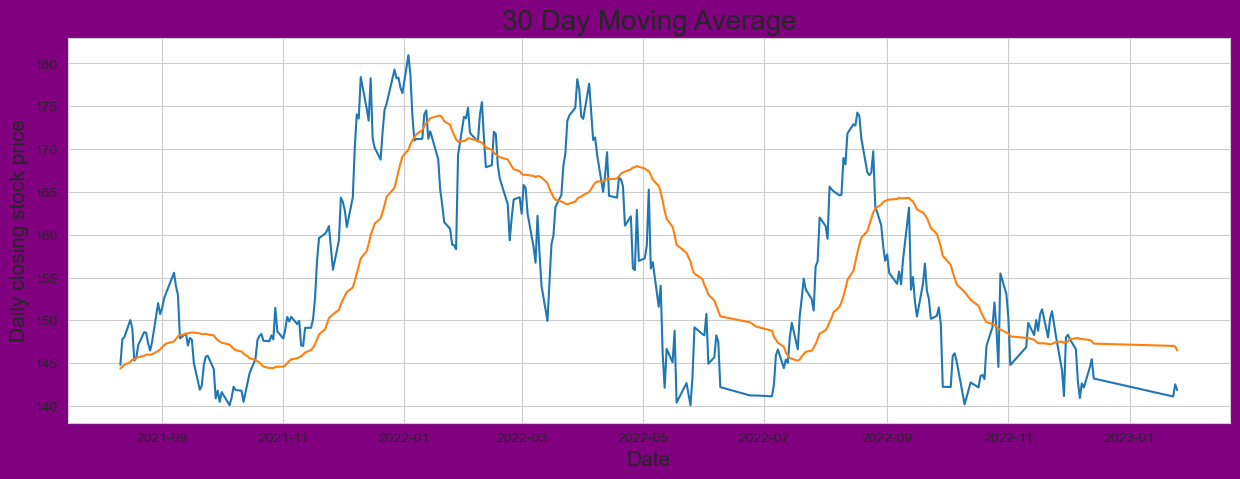

In [151]:
fig, ax = plt.subplots(figsize=(15,5), facecolor='purple')
ax.plot(ma[['Close','ma_30']].dropna())
ax.set_xlabel("Date", fontsize=15)
ax.set_ylabel("Daily closing stock price", fontsize=15)
ax.set_title('30 Day Moving Average', fontsize=20)

fig.savefig('30_day_moving_average.png')

In [135]:
ma['exp_30']=ma['Close'].ewm(span=30).mean()

<AxesSubplot:xlabel='date'>

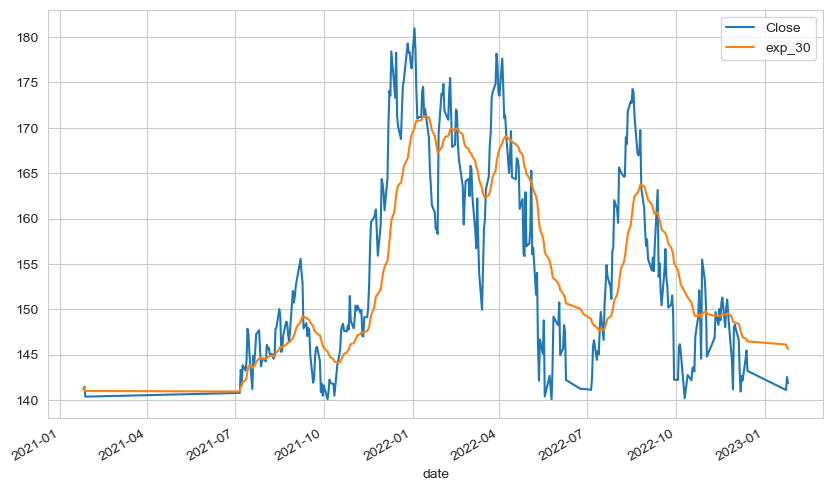

In [136]:
ma[['Close','exp_30']].dropna().plot(figsize=(10,6))

## Hypothesis Testing

In [152]:
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
date,,,,,,,
1998-01-26,0.147936,0.148888,0.143180,0.147936,146440000,0.0,0
1998-01-27,0.146034,0.149839,0.144607,0.145558,112235200,0.0,0
1998-01-28,0.146034,0.147461,0.141753,0.146034,151121600,0.0,0
1998-01-29,0.144131,0.145558,0.140802,0.140802,211881600,0.0,0
1998-01-30,0.139374,0.143655,0.138898,0.139374,162444800,0.0,0
...,...,...,...,...,...,...,...
2023-01-19,134.080002,136.250000,133.770004,135.270004,58280400,0.0,0
2023-01-20,135.279999,138.020004,134.220001,137.869995,79972200,0.0,0
2023-01-23,138.119995,143.320007,137.899994,141.110001,81760300,0.0,0


In [153]:
null_hypothesis = {
    'H0': "There is no significant difference between closing price and volume traded for Apple stock."
    , 'H1': "There is significant differnce between closing price and volume traded for Apple stock."}

In [154]:
import math

from scipy import stats

In [155]:
alpha=0.05

In [156]:
def print_sig(p_value, alpha):
    if p_value < alpha:
        print("We reject our null hypothesis.")
        print(null_hypothesis['H1'])
    elif p_value > alpha:
        print("We fail to reject our null hypothesis.")
        print(null_hypothesis['H0'])
    else:
        print("Our test is inconclusive.")

In [157]:
t2, p2 = stats.ttest_ind(data.Close,data.Volume)
                    
print("t = " + str(t2))
print("p = " + str(p2))
print_sig(p2, alpha)

t = -86.42771967045731
p = 0.0
We reject our null hypothesis.
There is significant differnce between closing price and volume traded for Apple stock.


## Scaling

In [158]:
from sklearn.preprocessing import StandardScaler

In [159]:
df_close = data[['Close']]
df_volume = data[['Volume']]

In [160]:
scaler = StandardScaler()

In [161]:
standardized_close = scaler.fit_transform(df_close)

In [162]:
standardized_volume = scaler.fit_transform(df_volume)

In [163]:
df_standardized_close = pd.DataFrame(standardized_close, columns=['Close'])
df_standardized_volume = pd.DataFrame(standardized_volume, columns=['Volume'])

In [164]:
df_merged = pd.concat([df_standardized_close, df_standardized_volume], axis=1)
df_merged

,Close,Volume
0,-0.630607,-0.709631
1,-0.630663,-0.798398
2,-0.630652,-0.697481
3,-0.630776,-0.539800
4,-0.630809,-0.668096
...,...,...
6287,2.563112,-0.938419
6288,2.624564,-0.882125
6289,2.701145,-0.877485
6290,2.734707,-0.917256


In [165]:
t2, p2 = stats.ttest_ind(df_merged.Close,df_merged.Volume)
                    
print("t = " + str(t2))
print("p = " + str(p2))
print_sig(p2, alpha)

t = -6.080195836366001e-15
p = 0.9999999999999951
We fail to reject our null hypothesis.
There is no significant difference between closing price and volume traded for Apple stock.


## Model- Linear Regression

In [166]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [167]:
data.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
date,,,,,,,
2023-01-24,140.309998,143.160004,140.300003,142.529999,66435100,0.0,0
2023-01-25,140.889999,142.429993,138.809998,141.860001,65652500,0.0,0


In [168]:
y=data['Close']

In [169]:
X= data.drop(columns = ['Close'], axis = 1)

In [170]:
X

,Open,High,Low,Volume,Dividends,Stock Splits
date,,,,,,
1998-01-26,0.147936,0.148888,0.143180,146440000,0.0,0
1998-01-27,0.146034,0.149839,0.144607,112235200,0.0,0
1998-01-28,0.146034,0.147461,0.141753,151121600,0.0,0
1998-01-29,0.144131,0.145558,0.140802,211881600,0.0,0
1998-01-30,0.139374,0.143655,0.138898,162444800,0.0,0
...,...,...,...,...,...,...
2023-01-19,134.080002,136.250000,133.770004,58280400,0.0,0
2023-01-20,135.279999,138.020004,134.220001,79972200,0.0,0
2023-01-23,138.119995,143.320007,137.899994,81760300,0.0,0


In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [172]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [173]:
linear= LinearRegression()

In [174]:
linear.fit(X_train,y_train)

LinearRegression()

In [175]:
linear.score(X_test,y_test)

0.9999344528233719

Cross-validation

In [176]:
scores= cross_val_score(linear, X, y, cv=10)

In [177]:
scores.mean()

0.9988331421657722

In [178]:
y_preds = linear.predict(X_test)
y_preds

array([  1.12875566, 126.29977245,  17.21423153, ...,   3.61743408,
        30.42765236,   0.35087637])

In [179]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_preds, squared=True)

0.11913299074239352

In [180]:
from sklearn.metrics import r2_score

In [181]:
r2 = r2_score(y_test, y_preds)
print(f"R-squared: ", r2)

R-squared:  0.9999344528233719


In [182]:
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
adj_r2

0.9999342437414688

## Lasso

In [183]:
from sklearn.linear_model import Lasso, LassoCV

In [184]:
alphas = np.logspace(-6, 6, 200)
lasso_cv = LassoCV(alphas = alphas, cv = 10, max_iter = 100000,)
lasso_cv.fit(X_train, y_train)

LassoCV(alphas=array([1.00000000e-06, 1.14895100e-06, 1.32008840e-06, 1.51671689e-06,
       1.74263339e-06, 2.00220037e-06, 2.30043012e-06, 2.64308149e-06,
       3.03677112e-06, 3.48910121e-06, 4.00880633e-06, 4.60592204e-06,
       5.29197874e-06, 6.08022426e-06, 6.98587975e-06, 8.02643352e-06,
       9.22197882e-06, 1.05956018e-05, 1.21738273e-05, 1.39871310e-05,
       1.60705282e-05, 1.84642494e-0...
       4.10265811e+04, 4.71375313e+04, 5.41587138e+04, 6.22257084e+04,
       7.14942899e+04, 8.21434358e+04, 9.43787828e+04, 1.08436597e+05,
       1.24588336e+05, 1.43145894e+05, 1.64467618e+05, 1.88965234e+05,
       2.17111795e+05, 2.49450814e+05, 2.86606762e+05, 3.29297126e+05,
       3.78346262e+05, 4.34701316e+05, 4.99450512e+05, 5.73844165e+05,
       6.59318827e+05, 7.57525026e+05, 8.70359136e+05, 1.00000000e+06]),
        cv=10, max_iter=100000)

In [185]:
lasso_cv.score(X_test,y_test)

0.9998905054151654

In [186]:
alpha=lasso_cv.alpha_
alpha

1e-06

In [187]:
lasso=Lasso(alpha=alpha)
lasso.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.174e+03, tolerance: 7.831e+02
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1e-06)

In [188]:
lasso.score(X_test, y_test)

0.9996499380775152

In [189]:
y_pred = lasso.predict(X_test)

In [190]:
mse = mean_squared_error(y_test, y_pred)

In [191]:
print("Mean Squared Error:", mse)

Mean Squared Error: 0.6362428698833162


In [192]:
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

R^2: 0.9996499380775152


## Ridge

In [193]:
from sklearn.linear_model import Ridge, RidgeCV

In [194]:
alphas = np.logspace(-6, 6, 200)
ridge_cv = RidgeCV(alphas = alphas, cv = 10)
ridge_cv.fit(X_train, y_train)

RidgeCV(alphas=array([1.00000000e-06, 1.14895100e-06, 1.32008840e-06, 1.51671689e-06,
       1.74263339e-06, 2.00220037e-06, 2.30043012e-06, 2.64308149e-06,
       3.03677112e-06, 3.48910121e-06, 4.00880633e-06, 4.60592204e-06,
       5.29197874e-06, 6.08022426e-06, 6.98587975e-06, 8.02643352e-06,
       9.22197882e-06, 1.05956018e-05, 1.21738273e-05, 1.39871310e-05,
       1.60705282e-05, 1.84642494e-0...
       4.10265811e+04, 4.71375313e+04, 5.41587138e+04, 6.22257084e+04,
       7.14942899e+04, 8.21434358e+04, 9.43787828e+04, 1.08436597e+05,
       1.24588336e+05, 1.43145894e+05, 1.64467618e+05, 1.88965234e+05,
       2.17111795e+05, 2.49450814e+05, 2.86606762e+05, 3.29297126e+05,
       3.78346262e+05, 4.34701316e+05, 4.99450512e+05, 5.73844165e+05,
       6.59318827e+05, 7.57525026e+05, 8.70359136e+05, 1.00000000e+06]),
        cv=10)

In [195]:
ridge_cv.score(X_test,y_test)

0.9999341770126612

In [196]:
alpha = ridge_cv.alpha_
alpha

0.002736439997074669

In [197]:
ridge = Ridge(alpha = ridge_cv.alpha_)
ridge.fit(X_train, y_train)

Ridge(alpha=0.002736439997074669)

In [198]:
ridge.score(X_test, y_test)

0.9999341770126612

In [199]:
y_pred = ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 0.11963428090522922


In [200]:
r2 = r2_score(y_test, y_pred)
print("R^2:", r2)

R^2: 0.9999341770126612


In [201]:
score= cross_val_score(ridge,X,y,cv=10)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.34598e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.3691e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.40075e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.76366e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarni

In [202]:
score.mean()

0.9988330801053709

## Grid Search

In [203]:
from sklearn.model_selection import GridSearchCV

In [204]:
alphas = np.logspace(-5, 5, 100)

In [205]:
grid = GridSearchCV(Ridge(), param_grid={'alpha': alphas}, cv=10)

In [206]:
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-05, 1.26185688e-05, 1.59228279e-05, 2.00923300e-05,
       2.53536449e-05, 3.19926714e-05, 4.03701726e-05, 5.09413801e-05,
       6.42807312e-05, 8.11130831e-05, 1.02353102e-04, 1.29154967e-04,
       1.62975083e-04, 2.05651231e-04, 2.59502421e-04, 3.27454916e-04,
       4.13201240e-04, 5.21400829e-04, 6.57933225e-04, 8...
       4.75081016e+02, 5.99484250e+02, 7.56463328e+02, 9.54548457e+02,
       1.20450354e+03, 1.51991108e+03, 1.91791026e+03, 2.42012826e+03,
       3.05385551e+03, 3.85352859e+03, 4.86260158e+03, 6.13590727e+03,
       7.74263683e+03, 9.77009957e+03, 1.23284674e+04, 1.55567614e+04,
       1.96304065e+04, 2.47707636e+04, 3.12571585e+04, 3.94420606e+04,
       4.97702356e+04, 6.28029144e+04, 7.92482898e+04, 1.00000000e+05])})

In [207]:
grid.score(X_test, y_test)

0.9999341852992041

In [208]:
alphas

array([1.00000000e-05, 1.26185688e-05, 1.59228279e-05, 2.00923300e-05,
       2.53536449e-05, 3.19926714e-05, 4.03701726e-05, 5.09413801e-05,
       6.42807312e-05, 8.11130831e-05, 1.02353102e-04, 1.29154967e-04,
       1.62975083e-04, 2.05651231e-04, 2.59502421e-04, 3.27454916e-04,
       4.13201240e-04, 5.21400829e-04, 6.57933225e-04, 8.30217568e-04,
       1.04761575e-03, 1.32194115e-03, 1.66810054e-03, 2.10490414e-03,
       2.65608778e-03, 3.35160265e-03, 4.22924287e-03, 5.33669923e-03,
       6.73415066e-03, 8.49753436e-03, 1.07226722e-02, 1.35304777e-02,
       1.70735265e-02, 2.15443469e-02, 2.71858824e-02, 3.43046929e-02,
       4.32876128e-02, 5.46227722e-02, 6.89261210e-02, 8.69749003e-02,
       1.09749877e-01, 1.38488637e-01, 1.74752840e-01, 2.20513074e-01,
       2.78255940e-01, 3.51119173e-01, 4.43062146e-01, 5.59081018e-01,
       7.05480231e-01, 8.90215085e-01, 1.12332403e+00, 1.41747416e+00,
       1.78864953e+00, 2.25701972e+00, 2.84803587e+00, 3.59381366e+00,
      

In [209]:
grid.best_params_['alpha']

0.0026560877829466868

In [210]:
data.corr().T

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Open,1.000000,0.999930,0.999912,0.999813,-0.416959,0.082621,0.008730
High,0.999930,1.000000,0.999898,0.999912,-0.416183,0.082066,0.009002
Low,0.999912,0.999898,1.000000,0.999915,-0.418064,0.082378,0.008722
Close,0.999813,0.999912,0.999915,1.000000,-0.417129,0.082302,0.008979
Volume,-0.416959,-0.416183,-0.418064,-0.417129,1.000000,-0.054751,-0.003832
Dividends,0.082621,0.082066,0.082378,0.082302,-0.054751,1.000000,-0.001753
Stock Splits,0.008730,0.009002,0.008722,0.008979,-0.003832,-0.001753,1.000000


## 3 features

In [211]:
X=data[['Volume']]

In [212]:
y=data['Close']

In [213]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [214]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [215]:
X_train

array([[ 0.09148001],
       [-0.74177192],
       [ 3.64600806],
       ...,
       [-0.72215113],
       [-0.88919389],
       [-0.35281559]])

In [216]:
linear1= LinearRegression()

In [217]:
linear1.fit(X_train,y_train)

LinearRegression()

In [218]:
linear1.score(X_test,y_test)

0.15829525623534635

In [219]:
X=data[['Volume','Stock Splits', 'Dividends']]
y=data['Close']

In [220]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [221]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [222]:
linear2= LinearRegression()

In [223]:
linear2.fit(X_train,y_train)

LinearRegression()

In [224]:
linear2.score(X_test,y_test)

0.16526834619231445

In [225]:
X=data[['Volume','Stock Splits', 'Dividends','Open']]
y=data['Close']

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [227]:
linear3= LinearRegression()

In [228]:
linear3.fit(X_train,y_train)

LinearRegression()

In [229]:
linear3.score(X_test,y_test)

0.9995803893825792

## Logistic Regression

In [230]:
log=data.copy()
log.head(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
date,,,,,,,
1998-01-26,0.147936,0.148888,0.143180,0.147936,146440000,0.0,0
1998-01-27,0.146034,0.149839,0.144607,0.145558,112235200,0.0,0


In [231]:
a=log.loc[log['Close']>120,'Close']

<AxesSubplot:xlabel='date'>

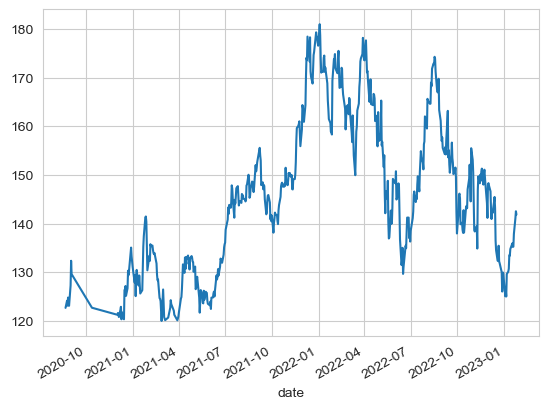

In [232]:
a.plot()

In [233]:
new_df= log.loc[log['Close']>120].copy()

In [234]:
new_df['Close'] = np.where(new_df['Close'] >= 145, 1, 0)

In [235]:
new_df.head(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
date,,,,,,,
2020-08-21,117.644839,123.173817,117.632511,0,338054800,0.0,0
2020-08-24,126.951866,127.038188,122.256435,0,345937600,0.0,0


In [236]:
new_df.Close.value_counts()

1    277
0    262
Name: Close, dtype: int64

Selecting the closing price above 120 and creating a new df and then converting linear regression to logistic regression wher 1 means to sell and 0 means to buy

In [237]:
new_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
date,,,,,,,
2020-08-21,117.644839,123.173817,117.632511,0,338054800,0.0,0
2020-08-24,126.951866,127.038188,122.256435,0,345937600,0.0,0
2020-08-25,123.006124,123.482077,121.383432,0,211495600,0.0,0
2020-08-26,124.468520,125.270000,123.385903,0,163022400,0.0,0
2020-08-27,125.417967,125.755820,122.152858,0,155552400,0.0,0
...,...,...,...,...,...,...,...
2023-01-19,134.080002,136.250000,133.770004,0,58280400,0.0,0
2023-01-20,135.279999,138.020004,134.220001,0,79972200,0.0,0
2023-01-23,138.119995,143.320007,137.899994,0,81760300,0.0,0


In [238]:
X= new_df.drop('Close',axis=1)
X

,Open,High,Low,Volume,Dividends,Stock Splits
date,,,,,,
2020-08-21,117.644839,123.173817,117.632511,338054800,0.0,0
2020-08-24,126.951866,127.038188,122.256435,345937600,0.0,0
2020-08-25,123.006124,123.482077,121.383432,211495600,0.0,0
2020-08-26,124.468520,125.270000,123.385903,163022400,0.0,0
2020-08-27,125.417967,125.755820,122.152858,155552400,0.0,0
...,...,...,...,...,...,...
2023-01-19,134.080002,136.250000,133.770004,58280400,0.0,0
2023-01-20,135.279999,138.020004,134.220001,79972200,0.0,0
2023-01-23,138.119995,143.320007,137.899994,81760300,0.0,0


In [239]:
y= new_df['Close']
y

date
2020-08-21    0
2020-08-24    0
2020-08-25    0
2020-08-26    0
2020-08-27    0
             ..
2023-01-19    0
2023-01-20    0
2023-01-23    0
2023-01-24    0
2023-01-25    0
Name: Close, Length: 539, dtype: int32

In [240]:
new_df.Close.value_counts()

1    277
0    262
Name: Close, dtype: int64

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=0.3)

In [242]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [243]:
X_train

array([[ 0.41297458,  0.36337475,  0.44475356,  0.29111415, -0.13751196,
         0.        ],
       [-0.72190955, -0.74714573, -0.66730907, -0.40337339, -0.13751196,
         0.        ],
       [ 1.10793542,  1.09547802,  1.17483764, -0.85081574, -0.13751196,
         0.        ],
       ...,
       [ 2.0492948 ,  1.98094896,  2.08380846, -0.96112866, -0.13751196,
         0.        ],
       [ 1.52708782,  1.42612533,  1.19481321, -0.33163144, -0.13751196,
         0.        ],
       [-1.01243437, -0.98591353, -0.92408639, -0.45714704, -0.13751196,
         0.        ]])

In [244]:
X_test

array([[-3.88027157e-01, -4.31658873e-01, -4.70391257e-01,
         2.75212046e-02, -1.37511959e-01,  0.00000000e+00],
       [-1.61504809e+00, -1.66649360e+00, -1.59924099e+00,
         4.57881045e-01, -1.37511959e-01,  0.00000000e+00],
       [ 8.92948303e-01,  8.98518027e-01,  8.37055940e-01,
         2.28886174e-01, -1.37511959e-01,  0.00000000e+00],
       [-1.15452398e+00, -1.05046293e+00, -1.07483064e+00,
         5.77960561e-01, -1.37511959e-01,  0.00000000e+00],
       [ 5.97346151e-02,  1.35777608e-01, -1.14684647e-02,
         1.89038748e+00, -1.37511959e-01,  0.00000000e+00],
       [-1.75523510e+00, -1.62513184e+00, -1.66311543e+00,
         7.49395870e-01, -1.37511959e-01,  0.00000000e+00],
       [-3.43158139e-01, -4.08227510e-01, -5.64627440e-01,
         3.23550248e-01, -1.37511959e-01,  0.00000000e+00],
       [ 1.38012965e-01,  1.23830622e-01,  1.04283284e-01,
         4.80580083e-01, -1.37511959e-01,  0.00000000e+00],
       [-8.28476694e-01, -9.27631355e-01, -9.349

In [245]:
from sklearn.linear_model import LogisticRegression

In [246]:
log=LogisticRegression()

In [247]:
log.fit(X_train,y_train)

LogisticRegression()

In [248]:
log.score(X_train,y_train)

0.9655172413793104

In [249]:
log.score(X_test,y_test)

0.9691358024691358

In [250]:
scores=cross_val_score(LogisticRegression(),X,y,cv=10)

In [251]:
scores.mean()

0.48609364081062195

In [252]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report

In [253]:
y_pred = log.predict(X_test)
ac = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)


Accuracy is:  0.9691358024691358


              precision    recall  f1-score   support

           0       0.99      0.95      0.97        82
           1       0.95      0.99      0.97        80

    accuracy                           0.97       162
   macro avg       0.97      0.97      0.97       162
weighted avg       0.97      0.97      0.97       162



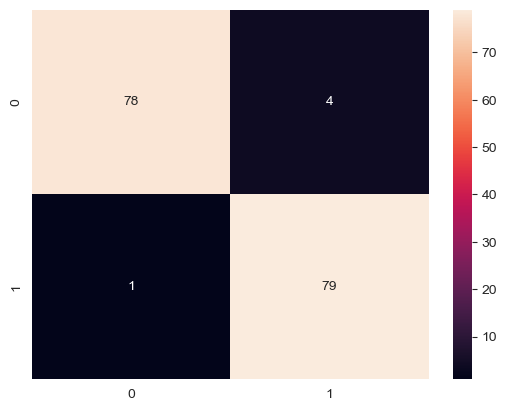

In [254]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d");
print(classification_report(y_test, y_pred))

## Support Vector Machines

In [255]:
from sklearn.svm import SVC

In [256]:
X= new_df.drop('Close',axis=1)
y=new_df['Close']

In [257]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=0.3)

In [258]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [259]:
svc_model = SVC(probability=True)
svc_model.fit(X_train, y_train)
svc_model.score(X_test, y_test)

0.9629629629629629

In [260]:
scores=cross_val_score(SVC(),X,y,cv=10)

In [261]:
scores.mean()

0.46380153738644303

In [262]:
y_pred = svc_model.predict(X_test)
ac = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)

Accuracy is:  0.9629629629629629


              precision    recall  f1-score   support

           0       0.99      0.94      0.96        82
           1       0.94      0.99      0.96        80

    accuracy                           0.96       162
   macro avg       0.96      0.96      0.96       162
weighted avg       0.96      0.96      0.96       162



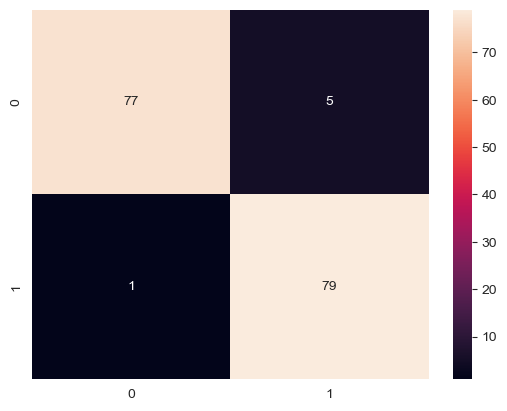

In [263]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d");
print(classification_report(y_test, y_pred))

## Naive Bayes

In [264]:
from sklearn.naive_bayes import GaussianNB

In [265]:
X= new_df.drop('Close',axis=1)
y=new_df['Close']

In [266]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size=0.3)

In [267]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [268]:
nb= GaussianNB()

In [269]:
nb.fit(X_train,y_train)

GaussianNB()

In [270]:
nb.score(X_test,y_test)

0.9629629629629629

In [271]:
scores=cross_val_score(nb,X,y,cv=10)

In [272]:
scores.mean()

0.4934311670160727

In [273]:
y_pred = nb.predict(X_test)
ac = accuracy_score(y_test,y_pred)
print('Accuracy is: ',ac)

Accuracy is:  0.9629629629629629


              precision    recall  f1-score   support

           0       0.99      0.94      0.96        82
           1       0.94      0.99      0.96        80

    accuracy                           0.96       162
   macro avg       0.96      0.96      0.96       162
weighted avg       0.96      0.96      0.96       162



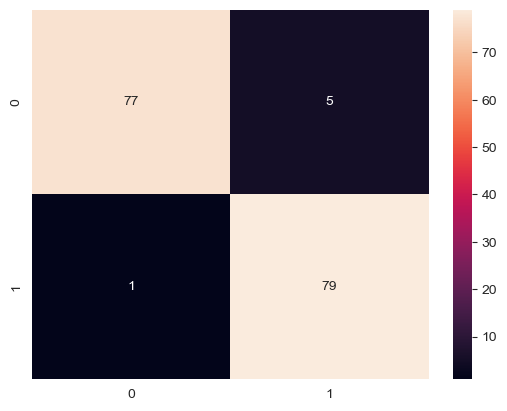

In [274]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d");
print(classification_report(y_test, y_pred))

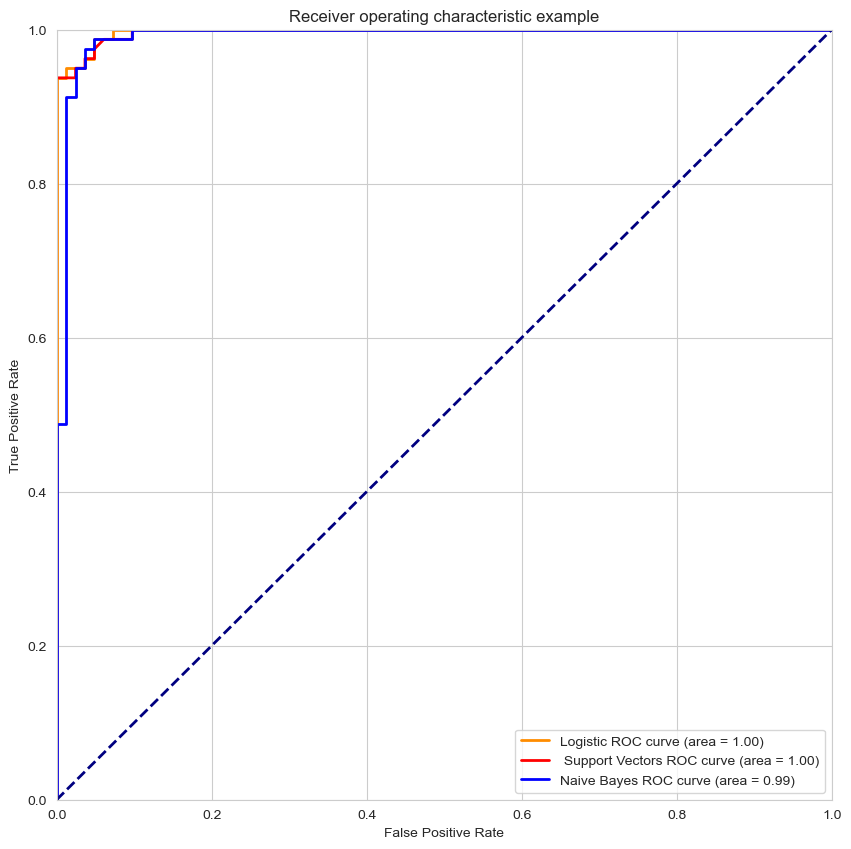

In [275]:
preds_log = log.predict_proba(X_test)[:,1]
preds_svc= svc_model.predict_proba(X_test)[:,1]
preds_nb= nb.predict_proba(X_test)[:,1]


fpr, tpr, _ = metrics.roc_curve(y_test, preds_log)
fpr_svc, tpr_svc, _= metrics.roc_curve(y_test, preds_svc)
fpr_nb, tpr_nb, _= metrics.roc_curve(y_test, preds_nb)


roc_auc = metrics.auc(fpr, tpr)
roc_auc1 = metrics.auc(fpr_svc, tpr_svc)
roc_auc2 = metrics.auc(fpr_nb, tpr_nb)


plt.figure(figsize=[10,10])
lw = 2

plt.plot(fpr, tpr, color='darkorange', lw = lw, label = 'Logistic ROC curve (area = %0.2f)' % roc_auc )
plt.plot(fpr_svc, tpr_svc, color='red', lw = lw, label = ' Support Vectors ROC curve (area = %0.2f)' % roc_auc1)
plt.plot(fpr_nb, tpr_nb,  color='blue', lw = lw, label = 'Naive Bayes ROC curve (area = %0.2f)' % roc_auc2)

plt.plot([0, 1], [0, 1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc = "lower right")
plt.show()
